In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

### a

In [3]:
transition_mat = np.array([[0.2, 0.7, 0.1],
                            [0.2, 0.5, 0.3],
                            [0.2, 0.4, 0.4]])
print(transition_mat)

[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.2 0.4 0.4]]


### b

In [4]:
# use this function
def markov_steps(n, transition_mat, start):
    """simulate markov process step by step from starting state"""
    all_states = []
    all_states.append(start)
    for i in range(n):
        all_states.append(np.random.choice([1,2,3], p=transition_mat[all_states[i]-1]))
    
    return all_states

[1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2]


Text(0, 0.5, 'State')

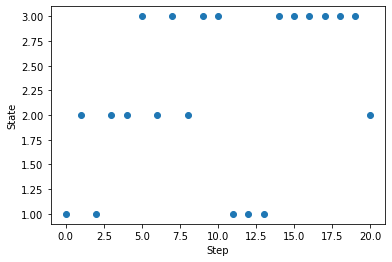

In [5]:
one_sim = markov_steps(20, transition_mat, 1)
print(one_sim)
plt.scatter(range(len(one_sim)), one_sim)
plt.xlabel('Step')
plt.ylabel('State')

## Question 2

### a

I can solve for the eigenvector with eigenvalue 1 of the transpose of the transition matrix since this is the equivalent of finding a vector when multiplied by the transmission matrix that stays the same. 

In [7]:
evalues, evectors = np.linalg.eig(transition_mat.T)
evalues

array([ 1.0000000e+00, -3.6140242e-17,  1.0000000e-01])

In [8]:
pi_inf = evectors[:,0]
pi_inf = pi_inf / pi_inf.sum()
pi_inf

array([0.2       , 0.51111111, 0.28888889])

The above is the stationary state of the process.

Check this works

In [9]:
new_pi = np.matmul(pi_inf, transition_mat)
new_pi

array([0.2       , 0.51111111, 0.28888889])

In [10]:
np.allclose(pi_inf, new_pi)

True

### b


In [11]:
def markov_sim(n, transition_mat, pi_0):
    """Get probabilities"""

    transition_mat_n = np.linalg.matrix_power(transition_mat, n)
    pi_n = np.matmul(pi_0, transition_mat_n)

    return pi_n

Text(0, 0.5, 'L2 Distance')

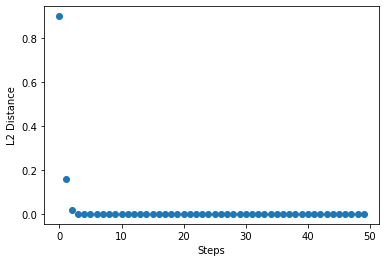

In [12]:
pi_0 = [0,0,1]

dists = []
for i in range(50):
    pi_i = markov_sim(i, transition_mat, pi_0)
    dists.append(np.linalg.norm(pi_i - pi_inf, ord=2))

plt.scatter(range(len(dists)), dists)
plt.xlabel('Steps')
plt.ylabel('L2 Distance')

In [13]:
pi_i

array([0.2       , 0.51111111, 0.28888889])

In [14]:
pi_inf

array([0.2       , 0.51111111, 0.28888889])

Text(0, 0.5, 'L2 Distance')

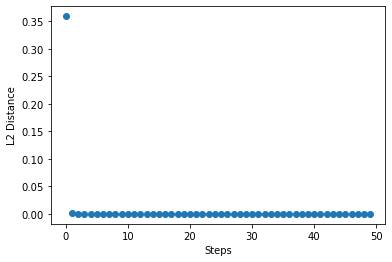

In [15]:
pi_0 = [.1,.8,.1]

dists = []
for i in range(50):
    pi_i = markov_sim(i, transition_mat, pi_0)
    dists.append(np.linalg.norm(pi_i - pi_inf, ord=2))

plt.scatter(range(len(dists)), dists)
plt.xlabel('Steps')
plt.ylabel('L2 Distance')

In [16]:
pi_i

array([0.2       , 0.51111111, 0.28888889])

In [17]:
pi_inf

array([0.2       , 0.51111111, 0.28888889])

We do see pi_i go to pi_infinity at mutliple conditions, very quickly.

## Question 3

4.6094


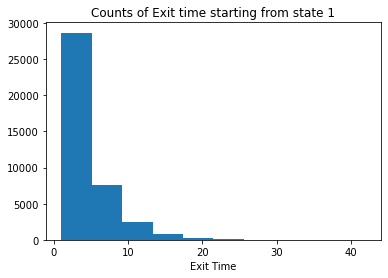

In [20]:
sims = 40000
starting = 1
exit = 3
exit_times = np.zeros(sims)
for i in range(sims):
    temp_steps = markov_steps(50, transition_mat, start=starting)
    exit_time = temp_steps.index(exit)
    exit_times[i] = exit_time

print(exit_times.mean())
plt.hist(exit_times)
plt.xlabel('Exit Time')
plt.title('Counts of Exit time starting from state 1')
plt.show()

3.83125


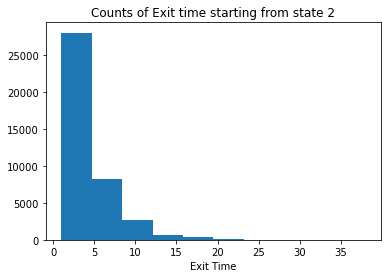

In [22]:
sims = 40000
starting = 2
exit = 3
exit_times = np.zeros(sims)
for i in range(sims):
    temp_steps = markov_steps(40, transition_mat, start=starting)
    exit_time = temp_steps.index(exit)
    exit_times[i] = exit_time

print(exit_times.mean())
plt.hist(exit_times)
plt.xlabel('Exit Time')
plt.title('Counts of Exit time starting from state 2')
plt.show()